<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## GeostatsPy Well-documented Demonstration Workflows 

### Determination of Major and Minor Directions of Spatial Continuity

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This is a tutorial for / demonstration of **Determination of Major and Minor Directions of Spatial Continuity** with GeostatsPy. 

**YouTube Lecture**: check out my lectures on:
        
* [Variogram Introduction](https://youtu.be/jVRLGOsnYuw?si=RD5exyGl_I_LAl4H)
* [Variogram Calculation](https://youtu.be/mzPLicovE7Q?si=-ZPgFK52h2xp1cER)
* [Variogram Parameters](https://youtu.be/NE4xfhIHAm4?si=dF18zj5_M2yVwxoD)
* [Variogram Directions](https://youtu.be/bryRCrtf3hk?si=058uFy-eTtTqwNPr)
* [Variogram Modeling](https://youtu.be/-Bi63Y3u6TU?si=-kwvFLicNTbg85xL)

For your convenience here's a summary of salient points.
    
#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

\begin{equation}
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
\end{equation}

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

* Calculated over a suite of lag distances to obtain a continuous function.

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

Note the correlogram is related to the covariance function as:

\begin{equation}
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
\end{equation}

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

\begin{equation}
-1.0 \le \rho_x(\bf{h}) \le 1.0
\end{equation}

#### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

##### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over somelag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

##### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

##### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

\begin{equation}
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

\begin{equation}
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
\end{equation}

##### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

##### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nuggect effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

#### Detecting Directions of Spatial Continuity

Spatial continuity can be described with nested spatial continuity models:

\begin{equation}
\Gamma_x(\bf{ h }) = \sum_{i=1}^{nst} \gamma_i(\bf{ h })
\end{equation}

where $\Gamma_x(\bf{h})$ is the nested variogram model resulting from the summation of $nst$ nested variograms  $\gamma_i(\bf{h})$.

Each one of these variogram structures, $\gamma_i(\bf{h})$, is based on a geometric anisotropy model parameterized by the orientation and range in the major and minor directions.  In 2D this is simply an azimuth and ranges, $azi$, $a_{maj}$ and $a_{min}$. Note, the range in the minor direction (orthogonal to the major direction.

The geometric anisotropy model assumes that the range in all off-diagonal directions is based on an ellipse with the major and minor axes alligned with and set to the major and minor for the variogram.

\begin{equation}
\bf{ h } _i = \sqrt{\left(\frac{r_{maj}}{a_{maj_i}}\right)^2 + \left(\frac{r_{maj}}{a_{maj_i}}\right)^2}  
\end{equation}

Therefore, if we know the major direction, range in major and minor directions, we may completely describe each nested componnent of the complete spatial continuity of the variable of interest, $i = 1,\dots,nst$.

In this workflow we will explore methods to detect directionality, major and minor directions of spatial continuity, from a spatial dataset.

#### Load the required libraries

The following code loads the required libraries. 

In [64]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__)) 

GeostatsPy version: 0.0.65


We will also need some standard packages. These should have been installed with Anaconda 3.

In [30]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                       # summary statistics
import math                                                   # trig etc.
import scipy.signal as signal                                 # kernel for moving window calculation
import random
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

This is a convenience function to add major and minor gridlines to our plots.

In [63]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [3]:
#os.chdir("d:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv") # load data
df = df[['X','Y','Facies','Porosity']]                        # retain only the required features
df.head(n=3)                                                  # DataFrame preview to check     

,X,Y,Facies,Porosity
0,100,900,1,0.115359
1,100,800,1,0.136425
2,100,600,1,0.135810


We will work with all facies pooled together. 

* I wanted to simplify this workflow and focus more on spatial continuity direction detection. Finally, by not using facies we do have more samples to support our statistical inference. Most often facies are essential in the subsurface model.

* You are welcome to repeat this workflow on a by-facies basis.  The following code could be used to build DataFrames ('df_sand' and 'df_shale') for each facies.

```python
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index()  # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index() # copy only 'Facies' = shale records
```

#### Summary Statistics for Tabular Data

Let's look at summary statistics for all facies combined:

In [9]:
df.describe().transpose()                                      # summary DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
X,289.0,475.813149,254.277530,0.000000,300.000000,430.000000,670.00000,990.00000
Y,289.0,529.692042,300.895374,9.000000,269.000000,549.000000,819.00000,999.00000
Facies,289.0,0.813149,0.390468,0.000000,1.000000,1.000000,1.00000,1.00000
Porosity,289.0,0.134744,0.037745,0.058548,0.106318,0.126167,0.15422,0.22879


#### Set Limits for Plotting, Colorbars and Map Specification

Limits are applied for data and model visualization.

In [44]:
xmin = 0.0; xmax = 1000.0                                     # spatial limits
ymin = 0.0; ymax = 1000.0

pormin = 0.05; pormax = 0.23                                  # feature limits
npormin = -3.0; npormax = 3.0                                 # feature limits

vario_min = 0.0; vario_max = 1.6                              # variogram limits

tmin = -9999.9; tmax = 9999.9                                 # triming limits

Let's transform the porosity and permeaiblity data to standard normal (mean = 0.0, standard deviation = 1.0, Gaussian shape). This is required for sequential Gaussian simulation (common target for our variogram models) and the Gaussian transform assists with outliers and provides more interpretable variograms. 

Let's look at the inputs for the GeostatsPy nscore program.  Note the output include an ndarray with the transformed values (in the same order as the input data in Dataframe 'df' and column 'vcol'), and the transformation table in original values and also in normal score values. 

In [10]:
geostats.nscore                                                # GeostatsPy's Gaussian transform

<function geostatspy.geostats.nscore(df, vcol, wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)>

The following command will transform the Porosity and to standard normal.

* Gaussian distributed with a mean of 0.0 and standard deviation and variance of 1.0.

In [11]:
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity')     # nscore transform for all facies porosity 

Let's look at the updated DataFrame to make sure that we now have the normal score porosity and permeability.

In [12]:
df.head()                                                       # preview sand DataFrame with nscore transforms

,X,Y,Facies,Porosity,NPor
0,100,900,1,0.115359,-0.391400
1,100,800,1,0.136425,0.299307
2,100,600,1,0.135810,0.272201
3,100,500,0,0.094414,-1.269810
4,100,100,0,0.113049,-0.496733


That looks good! 

* One way to check is to see if the relative magnitudes of the normal score transformed values match the original values, e.g, that the normal score transform of 0.10 porosity normal score is less than the normal score transform of 0.14 porsity.  
* Also, the normal score transform of values close to the original distribution's mean should be close to 0.0. 

Let's also check the original and transformed sand and shale porosity distributions.

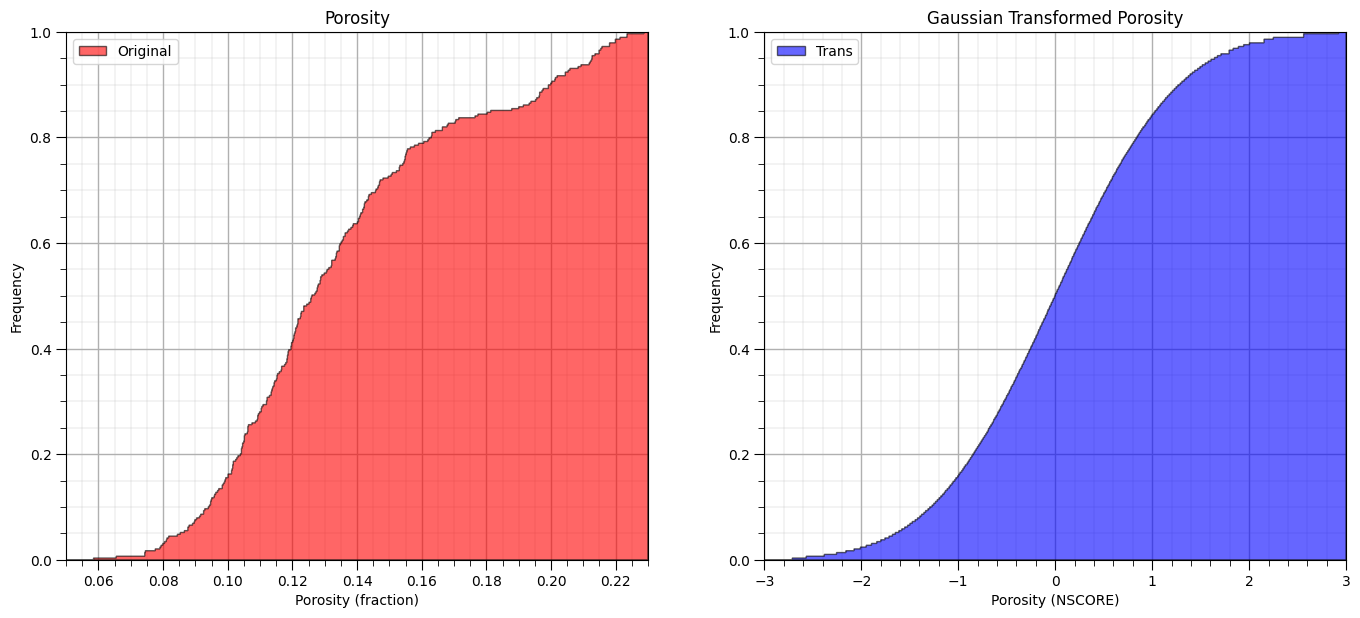

In [26]:
plt.subplot(121)                                                # plot original and transformed CDFs
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity')     # nscore transform for all facies porosity 
plt.hist(df['Porosity'], facecolor='red',bins=np.linspace(pormin,pormax,1000),histtype="stepfilled",alpha=0.6,
         density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([pormin,pormax]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left'); add_grid()

plt.subplot(122)  
plt.hist(df['NPor'], facecolor='blue',bins=np.linspace(npormin,npormax,1000),histtype="stepfilled",alpha=0.6,
         density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([npormin,npormax]); plt.ylim([0,1.0])
plt.xlabel('Porosity (NSCORE)'); plt.ylabel('Frequency'); plt.title('Gaussian Transformed Porosity')
plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

The normal score transform has correctly transformed the porosity and permeability to standard normal.

#### Method \#1:Ocular Inspection of Posted Data

Data visualization is very useful to detect patterns. Our brains are very good at pattern detection. I promote quantitative methods and recognize issues with cognitive bias, but it is important to recognize the value is expert intepretation based on data visualization.

* This data visualization will also be important to assist with parameter selection for the quantitative methods later.

Let's plot the location maps of normal score transforms of porosity and permeability for all facies. We will also include a cross plot of the nscore permeability vs. porosity colored by facies to aid with comparison in spatial features between the porosity and permeability data.

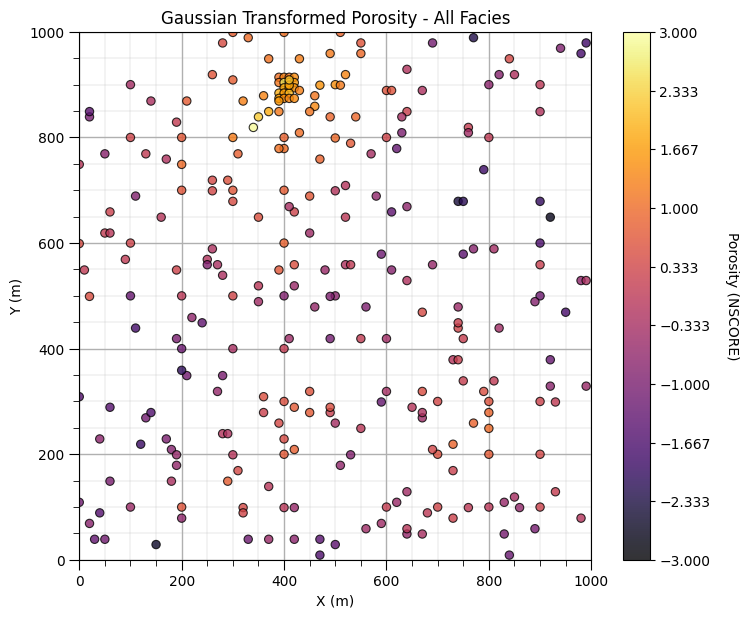

In [61]:
plt.subplot(111)                                              # GeostatsPy's location map
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Gaussian Transformed Porosity - All Facies','X (m)','Y (m)',
                'Porosity (NSCORE)',cmap); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.5, hspace=0.3); plt.show()

What do you see?  Here's my observations:

* there are no discontinuities that could suggest that facies represent a distinct change, rather the porosity seems continuous and the assigned facies are a truncation of their continous behavoir, we seem 'ok' without separating facies
* suspect a 045 azimuth major direction of continuity (up - right)
* there may be cycles in the 135 azimuth 
* there will not likely be a nugget effect, but there may be a hint of some short scale discontinuity?

**Do you agree?** If you have a different observations, drop me a line at mpyrcz@austin.utexas.edu and I'll add to this lesson with credit.

#### Quantitative Methods

Let's try out variogram maps. 

* we calculate the variogram over all distances and directions all at once!

The inputs include: 

* input data - DataFrame, 'df', and columns for x, y and property of interest, 'x', 'y' and 'vcol', 
* variogram map parameters - number of cells in each direction to search, 'nxlag', nylag', the cell size / lag distance, 'dxlag' and 'dylag'''
* search - the minimum number of pairs reuqired to assign a result, 'mnpairs'
* normalization - 1 for standardize variance to 1.0 and 0 for not

The output is a 2D ndarray with the variogram map and the number of pairs.

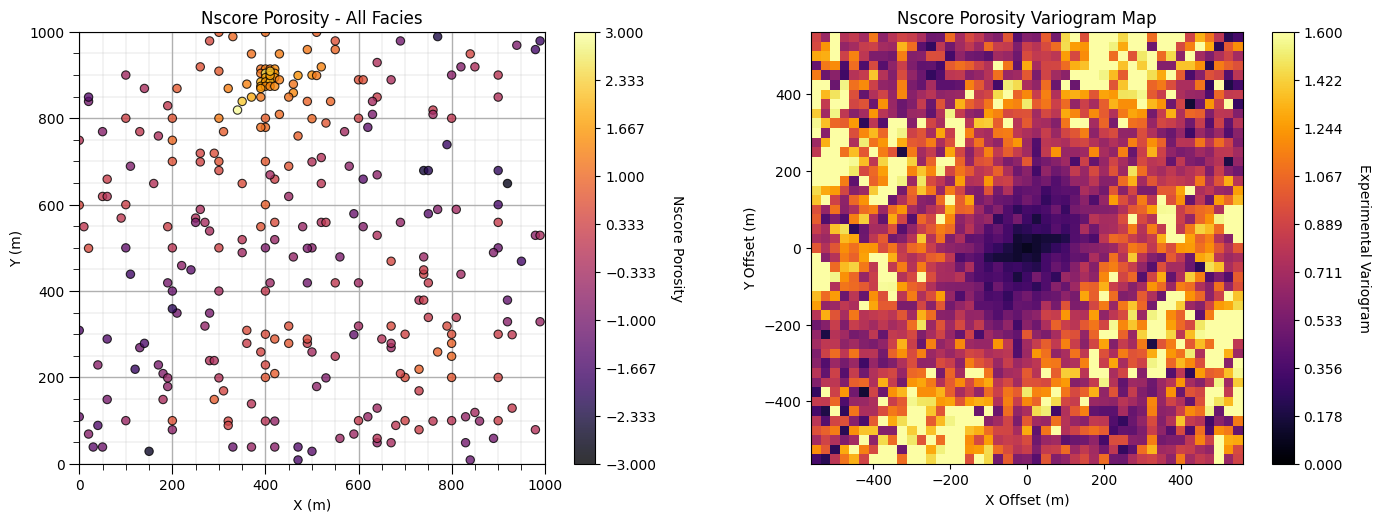

Variogram map output is (45, 45), with extents = [-562.5,562.5]


In [49]:
lag_size = 25; nlag = 22                                      # the resolution and extend of investigation

vmap, npmap = geostats.varmapv(df,'X','Y','NPor',tmin=-999,tmax=999,nxlag=nlag,nylag=nlag,
    dxlag=lag_size,dylag=lag_size,minnp=1,isill=1)            # calculate the variogram map

xmin = -1*(nlag + 0.5)*lag_size; ymin = -1*(nlag + 0.5)*lag_size 
xmax = (nlag + 0.5)*lag_size; ymax = (nlag + 0.5)*lag_size    # calculate the extents of the variogram map                

plt.subplot(121)                                              # plot data
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap=plt.cm.inferno); add_grid()
 
plt.subplot(122)                                              # plot variogram map
xx, yy = np.meshgrid(np.arange(xmin, xmax, step), np.arange(ymax, ymin, -1 * step))
im = plt.imshow(vmap,interpolation = None,extent = [xmin,xmax,ymin,ymax], vmin = vmin, vmax = vmax,
                cmap = plt.cm.inferno)
plt.title('Nscore Porosity Variogram Map'); plt.xlabel('X Offset (m)'); plt.ylabel('Y Offset (m)')
cbar = plt.colorbar(im, orientation="vertical", ticks=np.linspace(vmin, vmax, 10))
cbar.set_label('Experimental Variogram', rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.9, wspace=0.2, hspace=0.2); plt.show()

print('Variogram map output is ' + str(vmap.shape) + ', with extents = [' + str(xmin) + ',' + str(xmax) + ']')

Notice that the output ndarray is 45, 45 cells? 

* We asked for the number of cells to extend in each direction, 22 and 22 in x and y.  

* The map has an origin (zero distance) cell in the middle and extends 11 in both positive and negative directions.  

* So we have $2 \times nx + 1$, $2 \times ny + 1$ cells in the resulting variogram map and the $xmin = -1 \cdot (nx \cdot x_{cellsize} + \frac{1}{2} x_{cellsize})$ and the $xmax = nx \cdot x_{cellsize} + \frac{1}{2} x_{cellsize}$

What do you think of this variogram map? These are my observations:

* major continuity direction is at azimuth 045
* there is a high degree of geometric anisotropy
* there is cyclicity in the 135 direction 
* there may be some cyclicity in the 045 direction

From this variogram map we can immediately see directionality in our spatial data.

#### Experimental Variograms

Another method for exploring spatial data directionality is the calculation of multiple experimental variograms for a variety of directions.

We can use the location maps to help determine good variogram calculation parameters.

```p
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 50.0; nlag = 7; bandh = 9999.9; azi = azi; atol = 22.5; isill = 1
```
* tmin, tmax are trimming limits - set to have no impact, no need to filter the data
* lag_dist, lag_tol are the lag distance, lag tolerance - set based on the common data spacing (100m) and tolerance as 100% of lag distance for additonal smoothing
* nlag is number of lags - set to extend just past 50 of the data extent
* bandh is the horizontal band width - set to have no effect
* azi is the azimuth -  it has not effect since we set atol, the azimuth tolerance, to 90.0
* isill is a boolean to standardize the distribution to a variance of 1 - it has no effect since the nscore transform sets the variance to 1.0

In [51]:
lag_size = 25; nlag = 22                                      # the resolution and extend of investigation
lag_dist = 100.0; lag_tol = 50.0; nlag = 7;                   # maximum lag is 700m and tolerance > 1/2 lag distance
bandh = 9999.9; atol = 22.5                                   # no bandwidth, directional variograms
isill = 1                                                     # standardize sill
azi_mat = [0,22.5,45,67.5,90,112.5,135,157.5]                 # directions in azimuth to consider

Let's try running these variograms and visualizing them on separate plots.  I'll demonstrate a method to promgramtically loop over each direction for efficiency (and code brevity).

* we have the direction in the list called 'azi_mat'
* we use the command:
```p
for iazi in range(0,len(azi_mat)): 
```
to loop over all the elements in the list with index 'iazi'

* we run the variogram calculation and store the reuslts in 2D arrays, iy is direction, ix is the lag
* we use subplots with the 'iazi' index to add each plot

```p
    plt.subplot(4,2,iazi+1)
```
we add one because the plot index must be $1,\ldots,n$, but arrays / list index as $0,\ldots,n-1$ in Python.

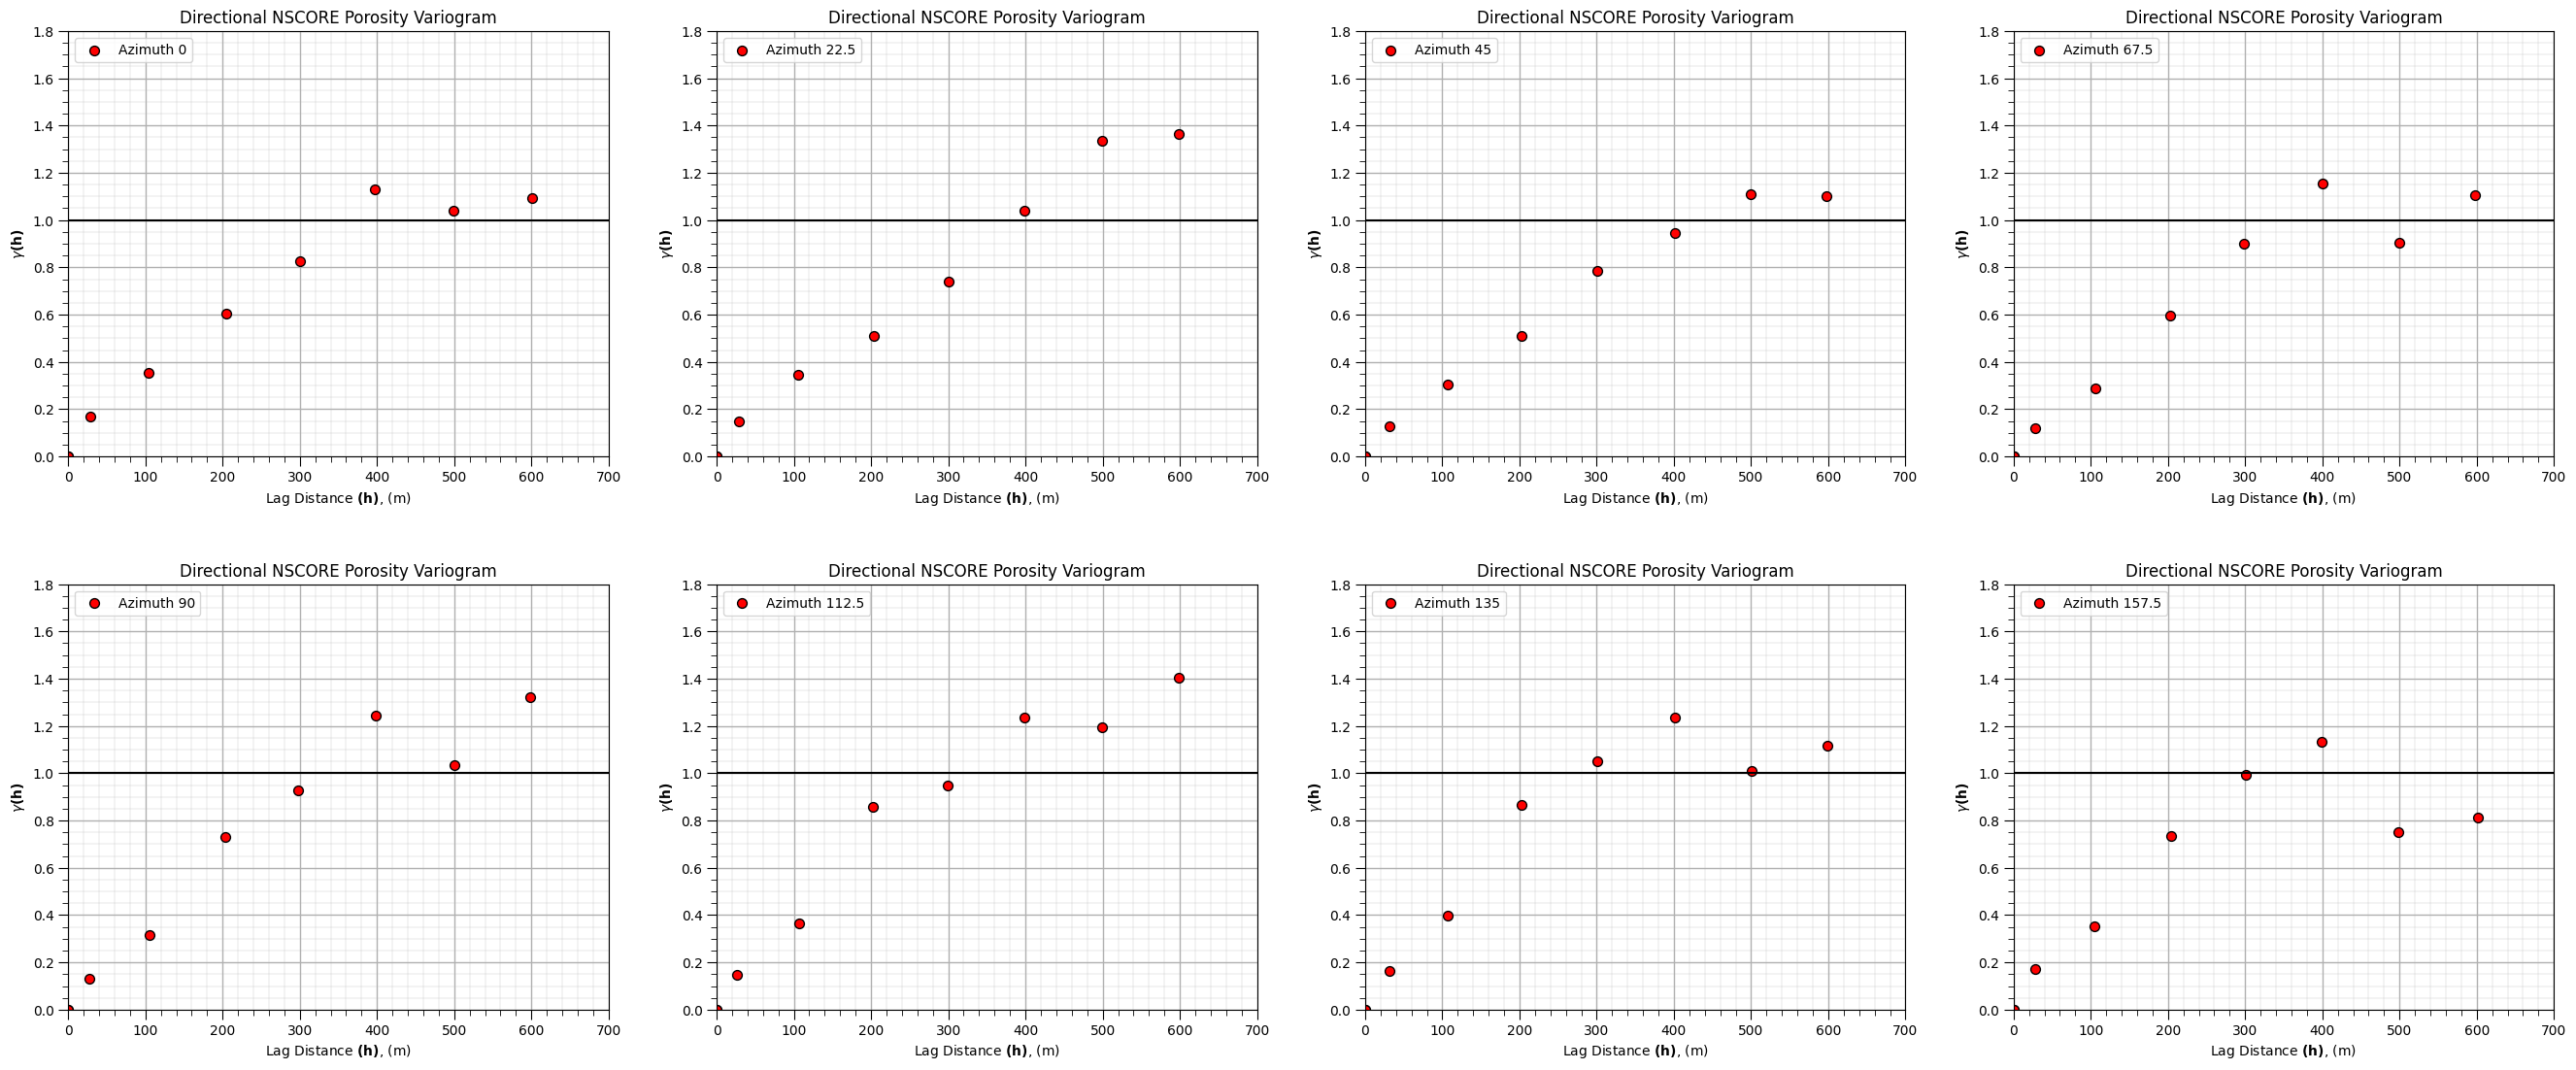

In [62]:
# Arrays to store the results
lag = np.zeros((len(azi_mat),nlag+2)); gamma = np.zeros((len(azi_mat),nlag+2)); npp = np.zeros((len(azi_mat),nlag+2));

for iazi in range(0,len(azi_mat)):                      # Loop over all directions
    lag[iazi,:], gamma[iazi,:], npp[iazi,:] = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi_mat[iazi],atol,bandh,isill)
    plt.subplot(2,4,iazi+1)
    plt.scatter(lag[iazi,:],gamma[iazi,:],marker='o',color ='red',edgecolor='black',
                s = 50, label = 'Azimuth ' +str(azi_mat[iazi]))
    plt.plot([0,2000],[1.0,1.0],color = 'black')
    plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
    plt.title('Directional NSCORE Porosity Variogram')
    plt.xlim([0,700]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=2.1, wspace=0.2, hspace=0.3)
plt.show()

The directional variograms provide a very clear image of directionality. The ranges vary from 300m, 500m to zonal anisotropy, to 500m, 350m, 280m, 250m and finally 280m.  We are observing the actually spatial continuity ellipse by exploring a variety of directions! 

* We can observe that Azimuth 045 is the major direction and Azimuth 135 is the minor direction.

This is a very powerful tool for exploring directionality in spatial datasets.

#### Comments

This was a basic demonstration of determining spatial continuity major and minor directions with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  